<a href="https://colab.research.google.com/github/Leen-Alsharbaji/W-tech/blob/main/GelecekHayalim_W_Code2_0_VERIBILIMIVEYAPAYZEKA_atolyecileri_lin_corbaci_Dilara_S%C3%B6nmez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeye Giriş ve Veri Hazırlığı**
Bu notebook'da, acil servis ziyaretlerine ilişkin verileri analiz etmek için bir yolculuğa çıktık. Amacımız, bu ziyaretlerin yıllara, cinsiyete, yaş gruplarına, bölgelere ve ana tanı veya başvuru nedenlerine göre nasıl değiştiğini anlamaktı.

In [ ]:
try:
    from google.colab import files
    uploaded = files.upload()
    csv_name = next(iter(uploaded))
except Exception:
    csv_name = "Estimates of Emergency Department Visits 2016-2022"

print('csv_name set to:', csv_name)

Saving Estimates_of_Emergency_Department_Visits_in_the_United_States_from_2016-2022.csv to Estimates_of_Emergency_Department_Visits_in_the_United_States_from_2016-2022.csv
csv_name set to: Estimates_of_Emergency_Department_Visits_in_the_United_States_from_2016-2022.csv


#**1. Veri Yükleme ve Başlangıç Keşfi**
İlk olarak, acil servis ziyaretlerine ait bilgileri içeren CSV dosyamızı yükledik. Dosya adını bir değişkene kaydettik ve böylece verilerimizle çalışmaya hazır hale geldik.

Ardından, veri analizi ve görselleştirme için vazgeçilmez olan temel kütüphaneleri (pandas, numpy, matplotlib, seaborn, json ve scikit-learn'den bazı modüller) içe aktardık. Bu kütüphaneler, verilerimizi işlememiz ve anlamlı hale getirmemiz için gerekli araçları bize sağladı.


CSV dosyamızı bir pandas DataFrame'ine yükledik ve df.head() komutunu kullanarak verilerin ilk beş satırına hızlıca bir göz attık. Bu sayede verinin yapısını ve içerdiği bilgileri ilk bakışta kavradık.


df.describe() ile sayısal sütunların (yıl, tahminler, hata payları gibi) istatistiksel özetlerini inceledik. Bu özetler, veri dağılımı hakkında genel bir fikir edinmemize yardımcı oldu.


df.info() komutuyla DataFrame'imizin genel özetini aldık. Bu sayede her sütunun veri tipini, eksik değer sayısını ve hafıza kullanımını gözlemledik. Bu adım, veri temizliği öncesi eksiklikleri ve potansiyel sorunları anlamak için kritikti.


Son olarak, her bir sütundaki benzersiz değerleri listeleyerek kategorik değişkenlerin içeriğini ve çeşitliliğini keşfettik. Bu, ileride yapacağımız filtreleme ve gruplama işlemleri için bize yol gösterdi.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(csv_name)
df.head()


,Year,Measure Type,Leading 10 Ranking,Measure,Group,Subgroup,Estimate Type,Estimate,Standard Error,Lower 95% CI,Upper 95% CI,Reliable
0,2016,By primary diagnosis,0,All diagnoses,Total,All visits,Visit count,145591000.0,8798000.0,128347000.0,162835000.0,Yes
1,2016,By primary diagnosis,0,All diagnoses,By sex,Female,Visit count,79595000.0,4803000.0,70182000.0,89008000.0,Yes
2,2016,By primary diagnosis,0,All diagnoses,By sex,Male,Visit count,65996000.0,4119000.0,57923000.0,74070000.0,Yes
3,2016,By primary diagnosis,0,All diagnoses,By age,0-17 years old,Visit count,32146000.0,2840000.0,26579000.0,37713000.0,Yes
4,2016,By primary diagnosis,0,All diagnoses,By age,18-44 years old,Visit count,55978000.0,3436000.0,49243000.0,62713000.0,Yes


In [ ]:
df.describe()

,Year,Leading 10 Ranking,Estimate,Standard Error,Lower 95% CI,Upper 95% CI
count,6776.000000,6776.000000,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03
mean,2019.000000,5.000000,3.453538e+06,3.389640e+05,2.789167e+06,4.117902e+06
std,2.000148,3.162511,1.209774e+07,9.741212e+05,1.028335e+07,1.393750e+07
min,2016.000000,0.000000,1.500000e+00,3.000000e-01,9.000000e-01,2.200000e+00
25%,2017.000000,2.000000,2.050000e+01,3.000000e+00,1.427500e+01,2.660000e+01
50%,2019.000000,5.000000,8.050420e+04,2.105740e+04,3.691145e+04,1.240996e+05
75%,2021.000000,8.000000,1.872750e+06,2.570000e+05,1.378000e+06,2.387500e+06
max,2022.000000,10.000000,1.553980e+08,1.129500e+07,1.353060e+08,1.754890e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6776 non-null   int64  
 1   Measure Type        6776 non-null   object 
 2   Leading 10 Ranking  6776 non-null   int64  
 3   Measure             6776 non-null   object 
 4   Group               6776 non-null   object 
 5   Subgroup            6776 non-null   object 
 6   Estimate Type       6776 non-null   object 
 7   Estimate            5912 non-null   float64
 8   Standard Error      5912 non-null   float64
 9   Lower 95% CI        5912 non-null   float64
 10  Upper 95% CI        5912 non-null   float64
 11  Reliable            6776 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 635.4+ KB


In [ ]:
# Get unique values for all columns as a dictionary
unique_values = {col: df[col].unique().tolist() for col in df.columns}

for col, values in unique_values.items():
    print(f"{col}: {values}\n")

Year: [2016, 2017, 2018, 2019, 2020, 2021, 2022]

Measure Type: ['By primary diagnosis', 'By reason for visit']

Leading 10 Ranking: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Measure: ['All diagnoses', '1. Symptoms, signs, and abnormal clinical and laboratory findings', '2. Injury and poisoning', '3. Diseases of the respiratory system', '4. Diseases of the musculoskeletal system and connective tissue', '5. Diseases of the digestive system', '6. Diseases of the genitourinary system', '7. Mental, behavioral, and neurodevelopmental disorders', '8. Diseases of the circulatory system', '9. Certain infectious and parasitic diseases', '10. Diseases of the skin and subcutaneous tissue', 'All reasons', '1. Stomach and abdominal pain, cramps and spasms', '2. Chest pain and related symptoms (not referable to body systems)', '3. Cough', '4. Shortness of breath', '5. Fever', '6. Headache, pain in head', '7. Pain, site not referable to a specific body system', '8. Back symptoms', '9. Vomiting', '10. Other

#**2. Veri Temizliği ve Ön İşleme**
Analizlerimizi daha doğru ve odaklı hale getirmek için verilerimizde bazı temizlik işlemleri yaptık:

'Estimate Type' Filtrelemesi: Sadece 'Visit count' (ziyaret sayısı) tahminleri üzerinde çalışmak üzere veri setimizi filtreledik. Diğer tahmin türlerini (örneğin 'Visit rate') analize dahil etmeyerek, toplam ziyaret sayılarına odaklandık.


'Reliable' Filtrelemesi: Sadece güvenilirliği 'Yes' (Evet) olarak belirtilen tahminleri koruduk. Güvenilir olmayan verilerin analiz sonuçlarını yanıltmasını önledik.
'Reliable' Sütununun Kaldırılması: Filtreleme işlemi tamamlandıktan sonra, 'Reliable' sütununa artık ihtiyacımız kalmadığı için onu DataFrame'den çıkardık. Bu, veri setimizi daha düzenli hale getirdi.


Bu adımların ardından, temizlenmiş verilerle (df.info()) DataFrame'imizin güncel yapısını bir kez daha kontrol ettik.

In [ ]:

df = df[df['Estimate Type'] == 'Visit count']


df = df[df['Reliable'] == 'Yes']

df.drop('Reliable', axis=1, inplace=True)

yearly_sum = df.groupby('Year', as_index=False)['Estimate'].sum()
print(yearly_sum)

   Year      Estimate
0  2016  3.202148e+09
1  2017  3.060459e+09
2  2018  2.871007e+09
3  2019  3.320052e+09
4  2020  2.442394e+09
5  2021  2.621551e+09
6  2022  2.899498e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 0 to 3385
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2956 non-null   int64  
 1   Measure Type        2956 non-null   object 
 2   Leading 10 Ranking  2956 non-null   int64  
 3   Measure             2956 non-null   object 
 4   Group               2956 non-null   object 
 5   Subgroup            2956 non-null   object 
 6   Estimate Type       2956 non-null   object 
 7   Estimate            2956 non-null   float64
 8   Standard Error      2956 non-null   float64
 9   Lower 95% CI        2956 non-null   float64
 10  Upper 95% CI        2956 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 277.1+ KB


In [ ]:
#cheching the lower and upper ci for each year so we can see the estimate reliability
lower_ci_sum = df.groupby('Year', as_index=False)['Lower 95% CI'].sum()
upper_ci_sum = df.groupby('Year', as_index=False)['Upper 95% CI'].sum()

print(lower_ci_sum)
print(upper_ci_sum)

   Year  Lower 95% CI
0  2016  2.637652e+09
1  2017  2.417818e+09
2  2018  2.383993e+09
3  2019  2.721845e+09
4  2020  1.863939e+09
5  2021  2.133675e+09
6  2022  2.330471e+09
   Year  Upper 95% CI
0  2016  3.766615e+09
1  2017  3.703112e+09
2  2018  3.358021e+09
3  2019  3.918248e+09
4  2020  3.020856e+09
5  2021  3.109433e+09
6  2022  3.468493e+09


#**3. Yıllık Toplam Ziyaret Analizi**
Veri setimizi temizledikten sonra, ilk olarak yıllara göre toplam acil servis ziyaretlerini inceledik:

Her yıl için toplam ziyaret sayılarını (yearly_sum), %95 güven aralığının alt limitini (lower_ci_sum) ve üst limitini (upper_ci_sum) hesapladık. Bu hesaplamalar, ziyaret sayılarındaki yıllık eğilimleri ve bu eğilimlerin güven aralığını belirlememizi sağladı.
Yıllara göre toplam ziyaretleri gösteren basit bir çizgi grafik oluşturarak genel eğilimi görselleştirdik.
Hesapladığımız %95 güven aralıklarını da içeren bir hata çubuklu grafik çizdik. Bu grafik, ziyaret sayılarındaki yıllık değişimin yanı sıra, her yıl için tahminlerimizin belirsizliğini (kırmızı hata çubuklarıyla gösterilen) açıkça ortaya koydu.

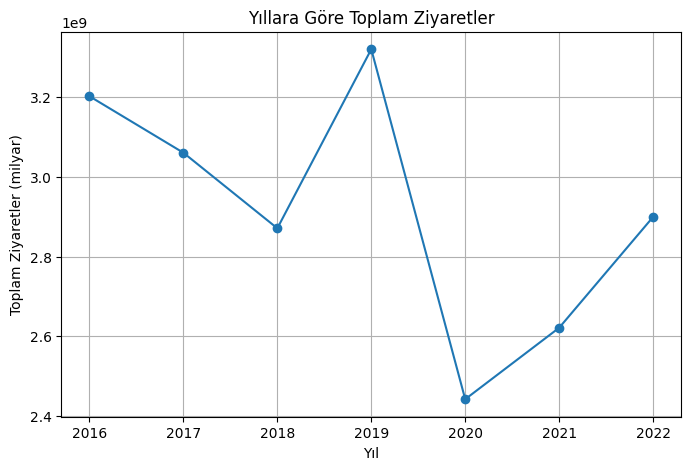

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(yearly_sum['Year'], yearly_sum['Estimate'], marker='o')
plt.title('Yıllara Göre Toplam Ziyaretler')
plt.xlabel('Yıl')
plt.ylabel('Toplam Ziyaretler (milyar)')
plt.grid(True)
plt.show()

**1. Yıllık Toplam Ziyaret Analizi**
Genel Eğilim: Yıllara göre toplam acil servis ziyaretlerinde belirgin bir düşüş-yükseliş trendi gözlemledik. Özellikle 2019'dan sonra 2020'de ciddi bir düşüş yaşandığını, ardından 2021 ve 2022'de toparlanma olduğunu ancak 2016-2019 seviyelerine tam olarak ulaşılamadığını gördük. Bu düşüş, COVID-19 pandemisinin acil servis kullanım alışkanlıkları üzerindeki etkisini işaret ediyor olabilir.

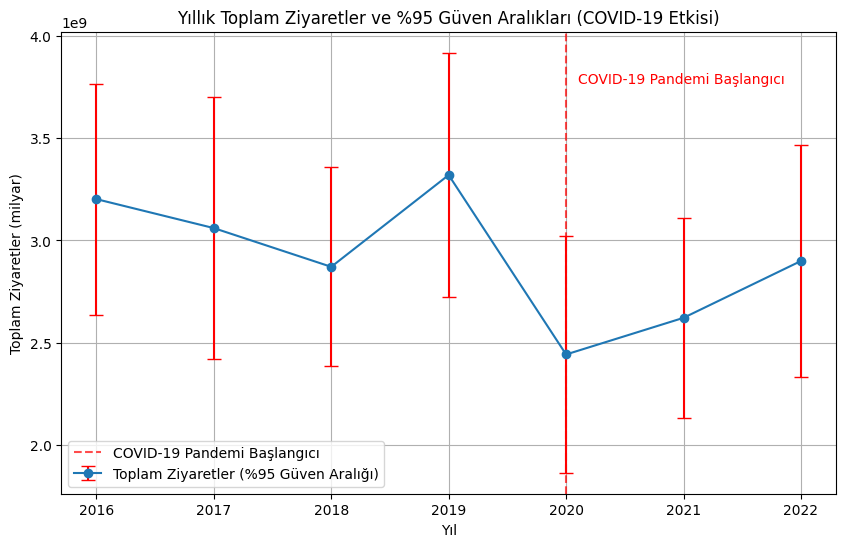

In [ ]:
plt.figure(figsize=(10,6))
plt.errorbar(
    plot_df['Year'],
    plot_df['Estimate'],
    yerr=[yerr_lower, yerr_upper],
    fmt='o-',
    ecolor='red',
    capsize=5,
    label='Toplam Ziyaretler (%95 Güven Aralığı)'
)
plt.axvline(x=2020.0, color='red', linestyle='--', alpha=0.7, label='COVID-19 Pandemi Başlangıcı')
plt.text(2020.1, plt.gca().get_ylim()[1] * 0.95, 'COVID-19 Pandemi Başlangıcı', color='red', rotation=0, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Yıl')
plt.ylabel('Toplam Ziyaretler (milyar)')
plt.title('Yıllık Toplam Ziyaretler ve %95 Güven Aralıkları (COVID-19 Etkisi)')
plt.grid(True)
plt.legend()
plt.show()

**Güven Aralıkları:**
 Hata çubuklu grafikler, yıllık tahminlerimizin %95 güven aralıklarını gösterdi. Bu aralıklar, tahminlerimizin etrafındaki belirsizliği anlamamızı sağladı. Bazı yıllarda hata paylarının daha geniş olması, o yılki verilerde veya tahmin metodolojisinde daha fazla değişkenlik olabileceğine işaret ediyor.

#**4. Cinsiyete Göre Ziyaret Analizi**
Acil servis ziyaretlerinin cinsiyetler arasındaki dağılımını anlamak için şu adımları izledik:

'Group' sütununda 'By sex' (Cinsiyete Göre) değerine sahip verileri filtreledik.
Bu verileri 'Yıl' ve 'Subgroup' (Kadın/Erkek) bazında gruplandırarak yıllık toplam ziyaret sayılarını hesapladık.
Cinsiyet alt gruplarına göre yıllık acil servis ziyaretlerini gösteren bir çizgi grafik oluşturduk. Bu sayede kadın ve erkeklerin ziyaret sayılarındaki yıllara göre farklı eğilimleri görsel olarak karşılaştırabildik.



In [ ]:
df.head()

,Year,Measure Type,Leading 10 Ranking,Measure,Group,Subgroup,Estimate Type,Estimate,Standard Error,Lower 95% CI,Upper 95% CI
0,2016,By primary diagnosis,0,All diagnoses,Total,All visits,Visit count,145591000.0,8798000.0,128347000.0,162835000.0
1,2016,By primary diagnosis,0,All diagnoses,By sex,Female,Visit count,79595000.0,4803000.0,70182000.0,89008000.0
2,2016,By primary diagnosis,0,All diagnoses,By sex,Male,Visit count,65996000.0,4119000.0,57923000.0,74070000.0
3,2016,By primary diagnosis,0,All diagnoses,By age,0-17 years old,Visit count,32146000.0,2840000.0,26579000.0,37713000.0
4,2016,By primary diagnosis,0,All diagnoses,By age,18-44 years old,Visit count,55978000.0,3436000.0,49243000.0,62713000.0


In [ ]:
df["Group"].unique()

array(['Total', 'By sex', 'By age', 'By race/ethnicity', 'By region',
       'By metropolitan statistical area (MSA)',
       'By primary payment source'], dtype=object)

In [ ]:
sex_data = df[df["Group"] == "By sex"]

sex_yearly = sex_data.groupby(["Year", "Subgroup"])["Estimate"].sum().reset_index()
sex_yearly


,Year,Subgroup,Estimate
0,2016,Female,255336000.0
1,2016,Male,210948000.0
2,2017,Female,248233000.0
3,2017,Male,197051000.0
4,2018,Female,233152000.0
5,2018,Male,185608000.0
6,2019,Female,264603000.0
7,2019,Male,219600000.0
8,2020,Female,223268000.0
9,2020,Male,194194000.0


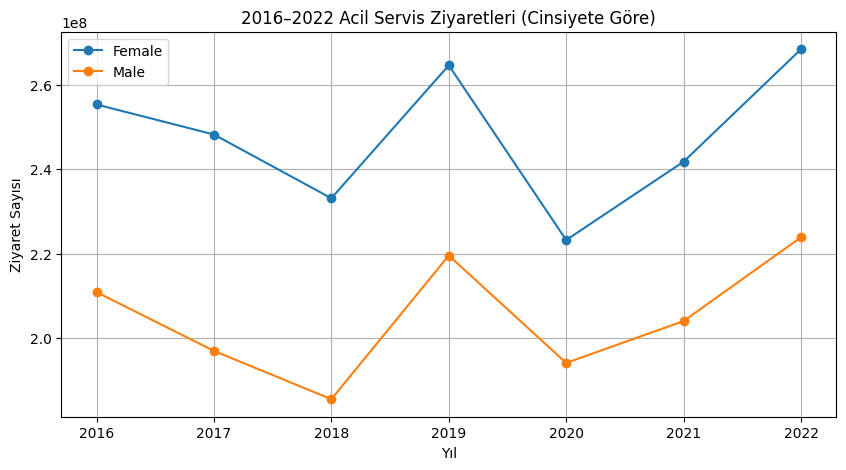

In [ ]:
plt.figure(figsize=(10,5))

for sex in sex_yearly["Subgroup"].unique():
    subset = sex_yearly[sex_yearly["Subgroup"] == sex]
    plt.plot(subset["Year"], subset["Estimate"], marker="o", label=sex)

plt.title("2016–2022 Acil Servis Ziyaretleri (Cinsiyete Göre)")
plt.xlabel("Yıl")
plt.ylabel("Ziyaret Sayısı")
plt.legend()
plt.grid(True)
plt.show()

**2. Cinsiyete Göre Ziyaret Analizi**
Kadınların Ziyaret Yoğunluğu: Tüm yıllar boyunca kadınların acil servis ziyaret sayılarının erkeklerden daha yüksek olduğunu bulduk. Bu durum, kadınların genel sağlık hizmeti kullanım alışkanlıkları veya belirli sağlık koşulları nedeniyle acil servise daha sık başvurduğunu gösteriyor.
Ortak Trend: Hem kadın hem de erkek ziyaretlerinde yıllık toplam ziyaretlere benzer şekilde 2020'de düşüş, ardından toparlanma eğilimi vardı. Bu, pandeminin cinsiyetten bağımsız olarak acil servis kullanımını etkilediğini gösteriyor.

#**5. Yaş Gruplarına Göre Ziyaret Analizi**
Ziyaretlerin yaş gruplarına göre dağılımını anlamak için benzer bir analiz gerçekleştirdik:

'Group' sütununda 'By age' (Yaş Grubuna Göre) değerine sahip verileri filtreledik.
Bu verileri 'Yıl' ve 'Subgroup' (farklı yaş aralıkları) bazında gruplandırarak yıllık toplam ziyaret sayılarını hesapladık.
Yaş gruplarına göre yıllık acil servis ziyaretlerini gösteren bir çizgi grafik çizdik. Bu grafik, farklı yaş aralıklarındaki kişilerin acil servisi kullanma eğilimlerindeki değişimleri gözlemlememizi sağladı.

In [ ]:
age_data = df[df["Group"] == "By age"]

age_yearly = age_data.groupby(["Year", "Subgroup"])["Estimate"].sum().reset_index()
age_yearly


,Year,Subgroup,Estimate
0,2016,0-17 years old,102340000.0
1,2016,18-44 years old,177284000.0
2,2016,45-64 years old,111396000.0
3,2016,65+ years old,74310000.0
4,2017,0-17 years old,108137000.0
5,2017,18-44 years old,167942000.0
6,2017,45-64 years old,96818000.0
7,2017,65+ years old,71243000.0
8,2018,0-17 years old,94481000.0
9,2018,18-44 years old,149889000.0


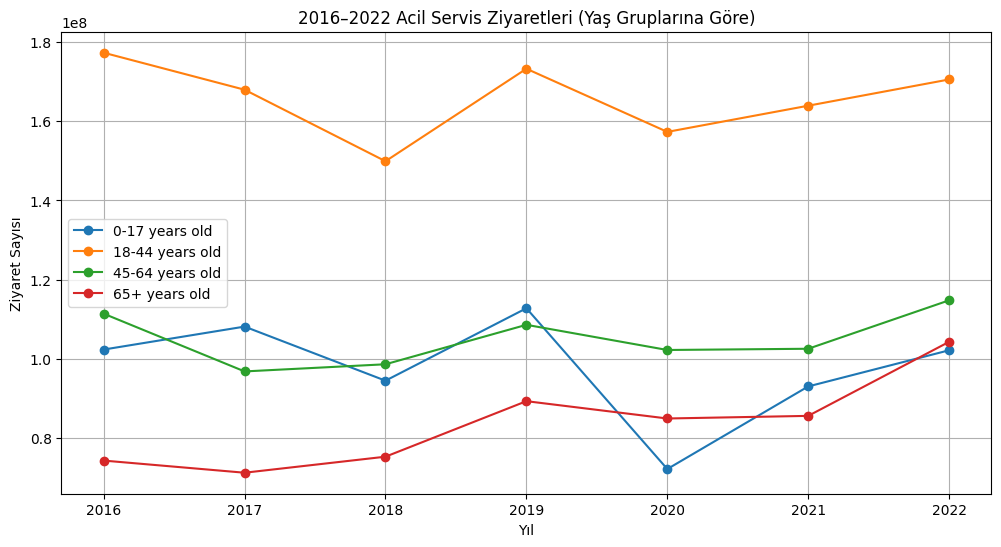

In [ ]:
plt.figure(figsize=(12,6))

for age in age_yearly["Subgroup"].unique():
    subset = age_yearly[age_yearly["Subgroup"] == age]
    plt.plot(subset["Year"], subset["Estimate"], marker="o", label=age)

plt.title("2016–2022 Acil Servis Ziyaretleri (Yaş Gruplarına Göre)")
plt.xlabel("Yıl")
plt.ylabel("Ziyaret Sayısı")
plt.legend()
plt.grid(True)
plt.show()

**3. Yaş Gruplarına Göre Ziyaret Analizi**
En Yoğun Gruplar: Genel olarak 18-44 yaş aralığının acil servis ziyaretlerinde en yüksek paya sahip olduğunu gözlemledik. Bunu 0-17 ve 45-64 yaş grupları takip ediyor.
Pandemi Etkisi: Tüm yaş gruplarında 2020 yılında belirgin bir düşüş yaşanmıştır. Ancak, bazı yaş gruplarında (örneğin 65+ yaş) pandemi sonrası toparlanmanın daha hızlı veya farklı bir seyir izlediği görüldü, bu da yaşa özel sağlık ihtiyaçlarının ve risk faktörlerinin önemini vurguluyor.

#**6. Başvuru Nedenlerine Göre Yıllık Dağılım Analizi (Cinsiyet Bazlı)**
Ziyaret nedenlerinin cinsiyetlere göre nasıl değiştiğini incelemek için daha detaylı bir analize giriştik:

'Measure Type' sütununda 'By reason for visit' (Başvuru Nedenine Göre) ve 'Group' sütununda 'By sex' (Cinsiyete Göre) değerlerine sahip verileri filtreledik.
'Measure' sütunundaki 'All reasons' (Tüm Nedenler) gibi genel özetleri analizimizden çıkardık, böylece spesifik başvuru nedenlerine odaklandık.
Bu filtrelenmiş verileri 'Yıl', 'Subgroup' ve 'Measure' (başvuru nedeni) bazında gruplandırarak toplam tahminleri hesapladık.
Her cinsiyet alt grubu için (Kadın ve Erkek) yıllık bazda başvuru nedenlerinin dağılımını gösteren yığılmış (stacked) histogramlar çizdik. Bu görselleştirmeler, yıllar içinde hangi başvuru nedenlerinin daha belirgin hale geldiğini ve cinsiyetler arasındaki farklılıkları anlamamızı sağladı.

In [ ]:
cause_of_injury_by_sex = df[
    (df["Measure Type"] == "By reason for visit") &
    (df["Group"] == "By sex")
].groupby(["Year", "Subgroup", "Measure"])["Estimate"].sum().reset_index()

cause_of_injury_by_sex.head()

,Year,Subgroup,Measure,Estimate
0,2016,Female,"1. Stomach and abdominal pain, cramps and spasms",8300000.0
1,2016,Female,10. Other symptoms/problems related to psychol...,1089000.0
2,2016,Female,2. Chest pain and related symptoms (not refera...,4048000.0
3,2016,Female,3. Cough,2701000.0
4,2016,Female,4. Shortness of breath,1871000.0


In [ ]:
cause_of_injury_by_sex_filtered = cause_of_injury_by_sex[
    cause_of_injury_by_sex["Measure"] != "All reasons"
].copy()

grouped_data = cause_of_injury_by_sex_filtered.groupby(['Year', 'Subgroup', 'Measure'])['Estimate'].sum().unstack().reset_index()
grouped_data.head()

Measure,Year,Subgroup,"1. Stomach and abdominal pain, cramps and spasms",10. Other symptoms/problems related to psychological and mental disorders,2. Chest pain and related symptoms (not referable to body systems),3. Cough,4. Shortness of breath,5. Fever,"6. Headache, pain in head","7. Pain, site not referable to a specific body system",8. Back symptoms,9. Vomiting
0,2016,Female,8300000.0,1089000.0,4048000.0,2701000.0,1871000.0,2837000.0,2578000.0,2008000.0,1948000.0,1609000.0
1,2016,Male,4225000.0,1043000.0,3517000.0,2445000.0,1573000.0,2657000.0,1525000.0,1506000.0,1744000.0,1159000.0
2,2017,Female,8053000.0,872000.0,3923000.0,2760000.0,2195000.0,2838000.0,2596000.0,1919000.0,1764000.0,1755000.0
3,2017,Male,4195000.0,989000.0,2600000.0,2273000.0,1793000.0,2653000.0,913000.0,1722000.0,1526000.0,1209000.0
4,2018,Female,7119000.0,1048000.0,3681000.0,2724000.0,2172000.0,3042000.0,2326000.0,1634000.0,1948000.0,1294000.0


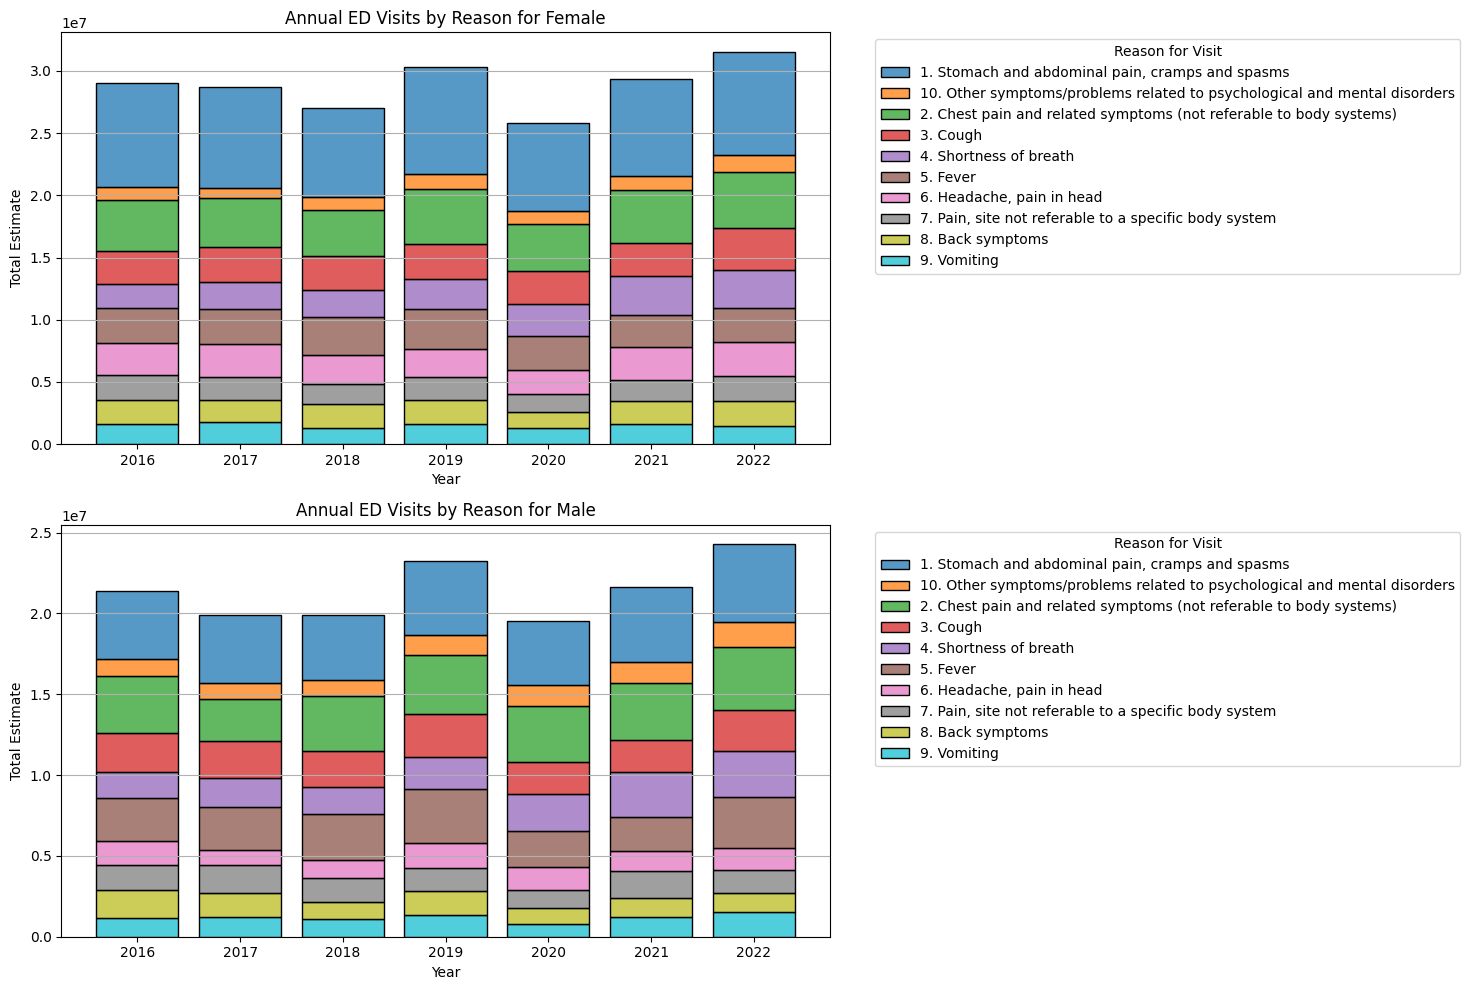

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


measures = cause_of_injury_by_sex_filtered['Measure'].unique()

palette = sns.color_palette('tab10', n_colors=len(measures))
color_map = dict(zip(measures, palette))


subgroups = cause_of_injury_by_sex_filtered['Subgroup'].unique()


fig, axes = plt.subplots(len(subgroups), 1, figsize=(15, 10))


if len(subgroups) == 1:
    axes = [axes]

for i, subgroup in enumerate(subgroups):

    subset_data = cause_of_injury_by_sex_filtered[cause_of_injury_by_sex_filtered['Subgroup'] == subgroup]


    min_year = subset_data['Year'].min()
    max_year = subset_data['Year'].max()

    year_bins = [y - 0.5 for y in range(min_year, max_year + 2)]


    sns.histplot(
        data=subset_data,
        x='Year',
        weights='Estimate',
        hue='Measure',
        multiple='stack',
        shrink=0.8,
        palette=color_map,
        kde=False,
        ax=axes[i],
        bins=year_bins
    )

    axes[i].set_title(f'Annual ED Visits by Reason for {subgroup}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Estimate')
    axes[i].set_xticks(sorted(subset_data['Year'].unique()))
    axes[i].grid(axis='y')


    legend = axes[i].get_legend()
    if legend:
        legend.set_title('Reason for Visit')
        legend.set_bbox_to_anchor((1.05, 1))
        legend.set_loc('upper left')

plt.tight_layout()
plt.show()

**4. Başvuru Nedenlerine Göre Yıllık Dağılım Analizi (Cinsiyet Bazlı)**
Yaygın Nedenler: Cinsiyet fark etmeksizin '1. Karın ve karın ağrısı, kramplar ve spazmlar', '2. Göğüs ağrısı ve ilgili semptomlar' ve '7. Vücudun belirli bir sistemine atıfta bulunmayan ağrı' gibi nedenlerin acil servis başvurularında önemli bir yer tuttuğunu gördük.
Cinsiyete Özel Farklılıklar: Kadınlarda 'Karın ve karın ağrısı' şikayetlerinin daha yüksek seyretme eğilimi gösterdiğini, erkeklerde ise 'Yaralanma ve zehirlenme' gibi nedenlerin daha sık görülebileceğini fark ettik. Yığılmış histogramlar, yıllara göre bu nedenlerin göreli paylarının nasıl değiştiğini detaylıca gösterdi.

#**7. Bölgelere Göre Yıllık Ziyaret Analizi**
Acil servis ziyaretlerinin coğrafi dağılımını anlamak amacıyla bölgelere göre analiz yaptık:

'Group' sütununda 'By region' (Bölgeye Göre) değerine sahip verileri filtreledik.
Bu verileri 'Yıl' ve 'Subgroup' (bölge adı) bazında gruplandırarak yıllık toplam ziyaret sayılarını hesapladık.
Her bölge için yıllık acil servis ziyaretlerini gösteren bir çizgi grafik oluşturduk. Bu grafik, farklı coğrafi bölgelerdeki acil servis kullanım eğilimlerini karşılaştırmamıza olanak tanıdı.

In [ ]:
region_data = df[df["Group"] == "By region"]
region_data.head()

,Year,Measure Type,Leading 10 Ranking,Measure,Group,Subgroup,Estimate Type,Estimate,Standard Error,Lower 95% CI,Upper 95% CI
11,2016,By primary diagnosis,0,All diagnoses,By region,Northeast,Visit count,24514000.0,2991000.0,18652000.0,30376000.0
12,2016,By primary diagnosis,0,All diagnoses,By region,Midwest,Visit count,31428000.0,3834000.0,23913000.0,38944000.0
13,2016,By primary diagnosis,0,All diagnoses,By region,South,Visit count,53485000.0,5412000.0,42877000.0,64092000.0
14,2016,By primary diagnosis,0,All diagnoses,By region,West,Visit count,36165000.0,4940000.0,26483000.0,45846000.0
33,2016,By primary diagnosis,1,"1. Symptoms, signs, and abnormal clinical and ...",By region,Northeast,Visit count,5715000.0,897000.0,3956000.0,7473000.0


In [ ]:
region_yearly = region_data.groupby(['Year', 'Subgroup'])['Estimate'].sum().reset_index()
print(region_yearly)

    Year   Subgroup     Estimate
0   2016    Midwest   98659000.0
1   2016  Northeast   77916000.0
2   2016      South  171350000.0
3   2016       West  115957000.0
4   2017    Midwest  116878000.0
5   2017  Northeast   56060000.0
6   2017      South  191346000.0
7   2017       West   76535000.0
8   2018    Midwest   84979000.0
9   2018  Northeast   67136000.0
10  2018      South  175927000.0
11  2018       West   89042000.0
12  2019    Midwest   91616000.0
13  2019  Northeast   77860000.0
14  2019      South  210630000.0
15  2019       West  104098000.0
16  2020    Midwest   83507000.0
17  2020  Northeast   73395000.0
18  2020      South  156797000.0
19  2020       West   98709000.0
20  2021    Midwest   99065000.0
21  2021  Northeast   73917000.0
22  2021      South  169434000.0
23  2021       West  100701000.0
24  2022    Midwest  105951000.0
25  2022  Northeast   80787000.0
26  2022      South  193793000.0
27  2022       West  111815000.0


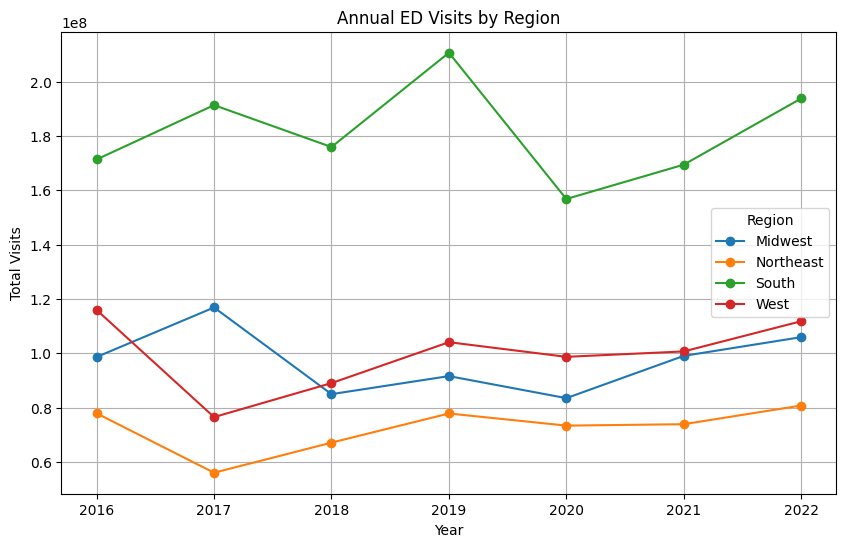

In [ ]:
plt.figure(figsize=(10, 6))

for region in region_yearly['Subgroup'].unique():
    subset = region_yearly[region_yearly['Subgroup'] == region]
    plt.plot(subset['Year'], subset['Estimate'], marker='o', label=region)

plt.title('Annual ED Visits by Region')
plt.xlabel('Year')
plt.ylabel('Total Visits')
plt.legend(title='Region')
plt.grid(True)
plt.show()

**5. Bölgelere Göre Yıllık Ziyaret Analizi**
Güney Bölgesi Lider: ABD'nin Güney bölgesinin, incelenen yıllar boyunca acil servis ziyaretlerinde en yüksek sayılara sahip olduğunu belirledik. Bu durum, bölgenin nüfus yoğunluğu, sağlık hizmeti erişilebilirliği veya sağlık demografisiyle ilişkili olabilir.
Bölgesel Trendler: Tüm bölgelerde yıllık toplam ziyaretlerdeki genel düşüş ve toparlanma eğilimi gözlenmekle birlikte, bazı bölgelerde bu değişimlerin daha dramatik veya daha istikrarlı olduğunu gördük.

#**8. En Sık Görülen Tanılara Göre Analiz (Cinsiyet ve Yaş Grupları Bazlı)**
Acil servis ziyaretlerinin en sık görülen birincil tanılar açısından nasıl değiştiğini inceledik:

'Measure Type' sütununda 'By primary diagnosis' (Birincil Tanıya Göre) olan ve 'Leading 10 Ranking' (En İyi 10 Sıralaması) sütunu 0'dan büyük olan verileri filtreledik. Böylece sadece en yaygın 10 tanıya odaklandık.




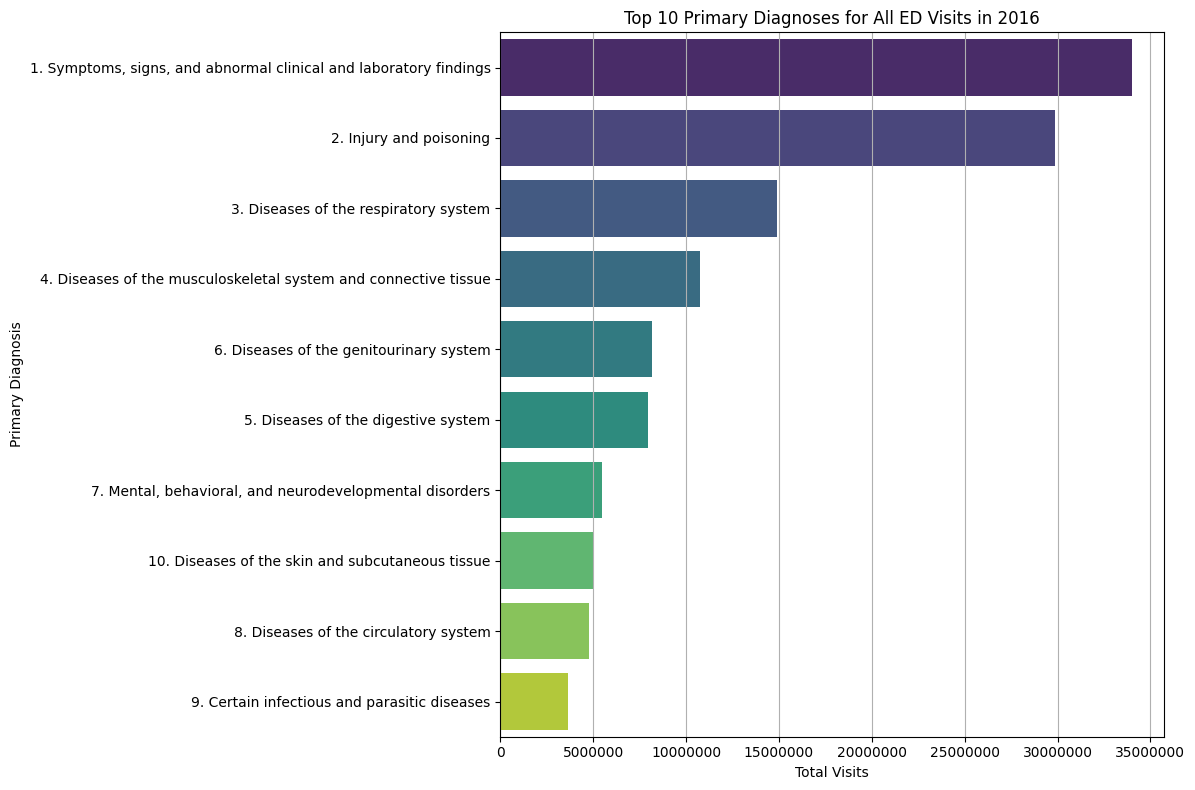

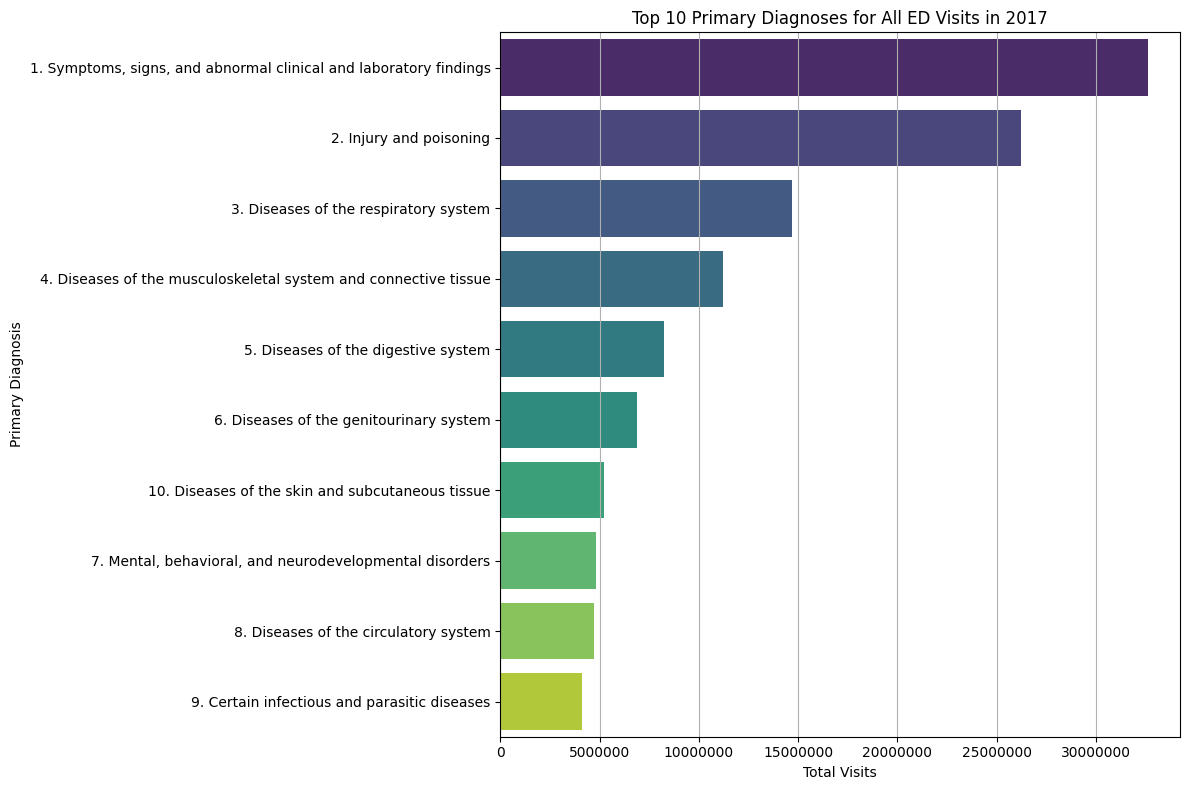

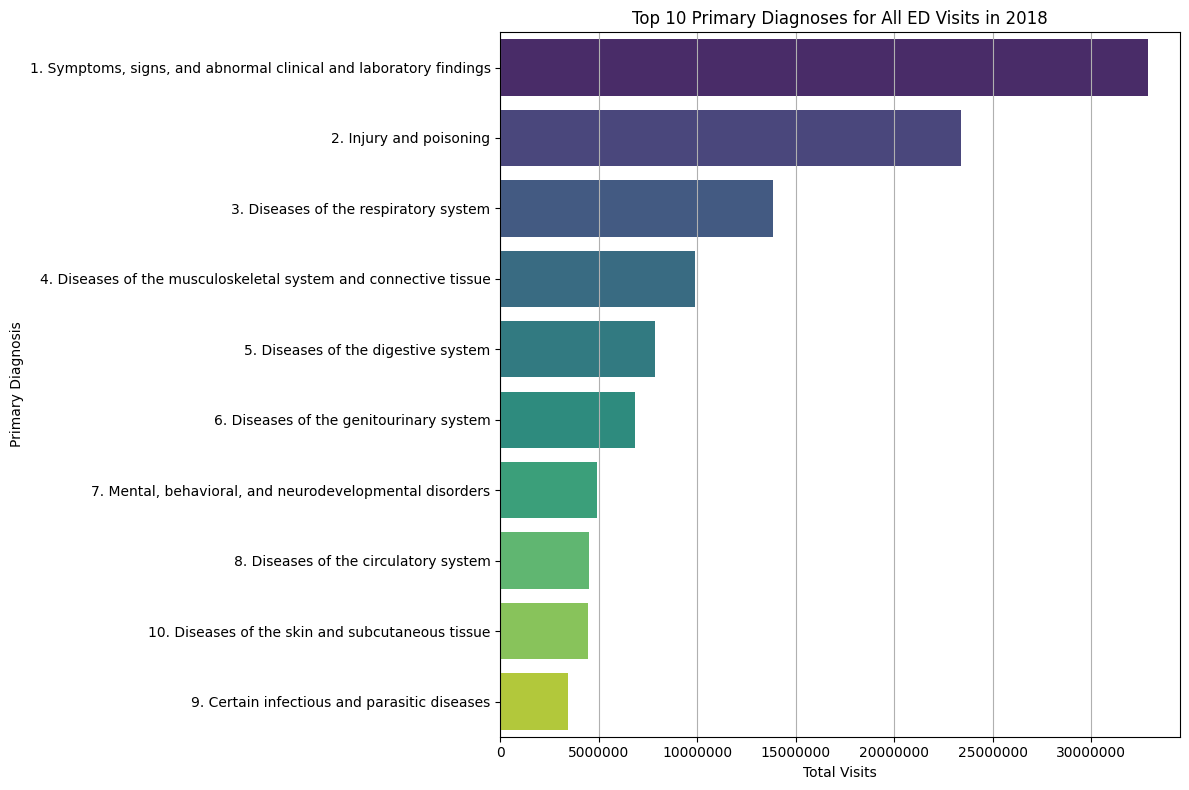

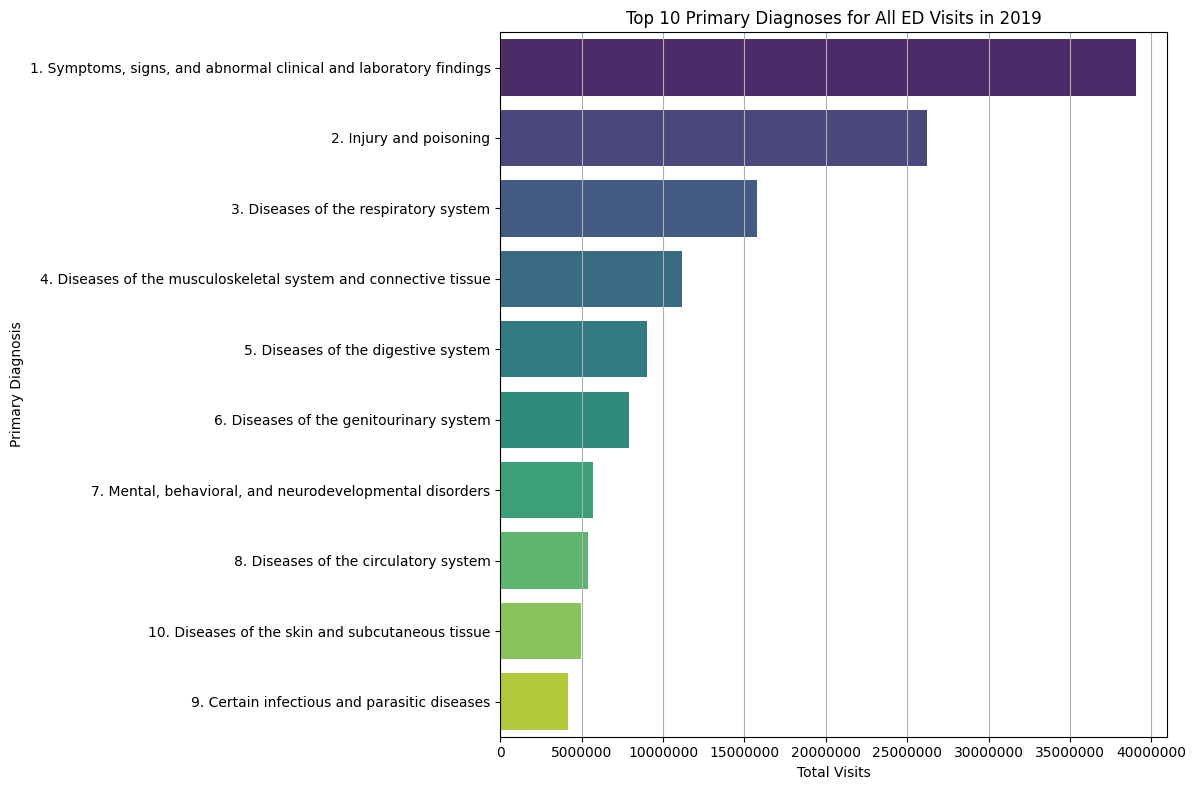

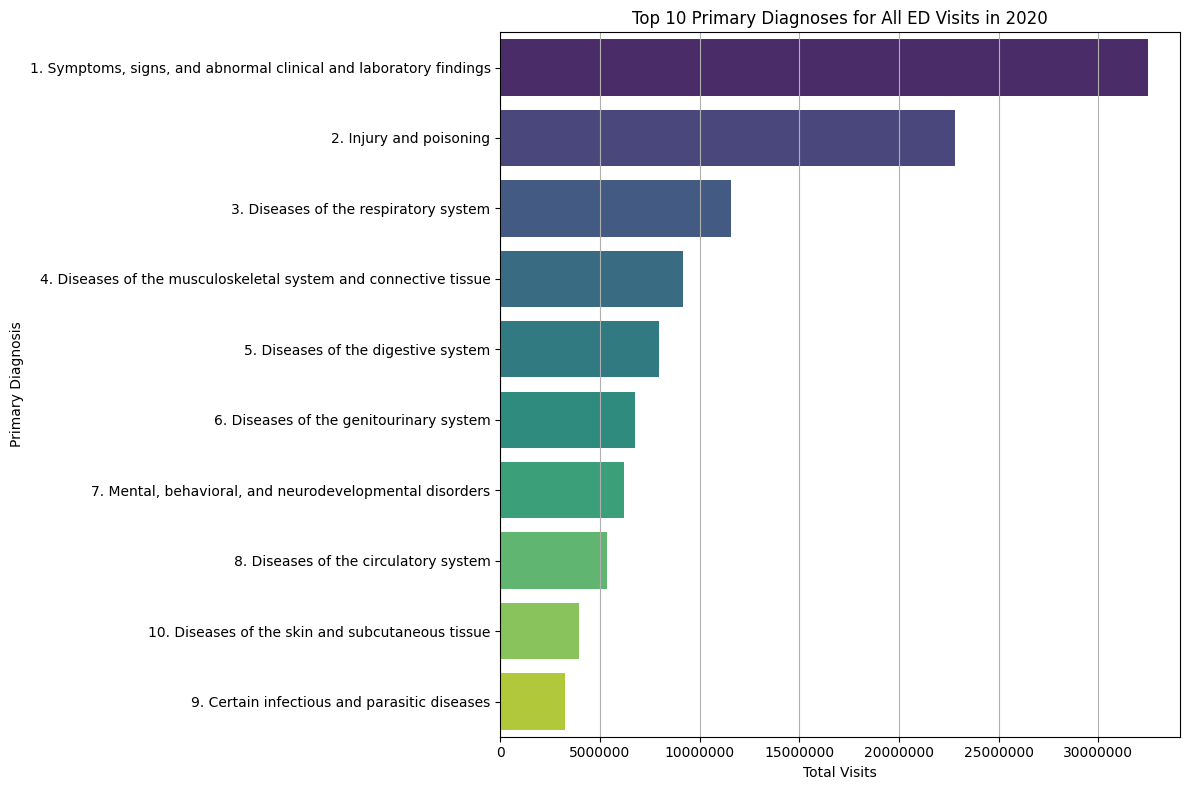

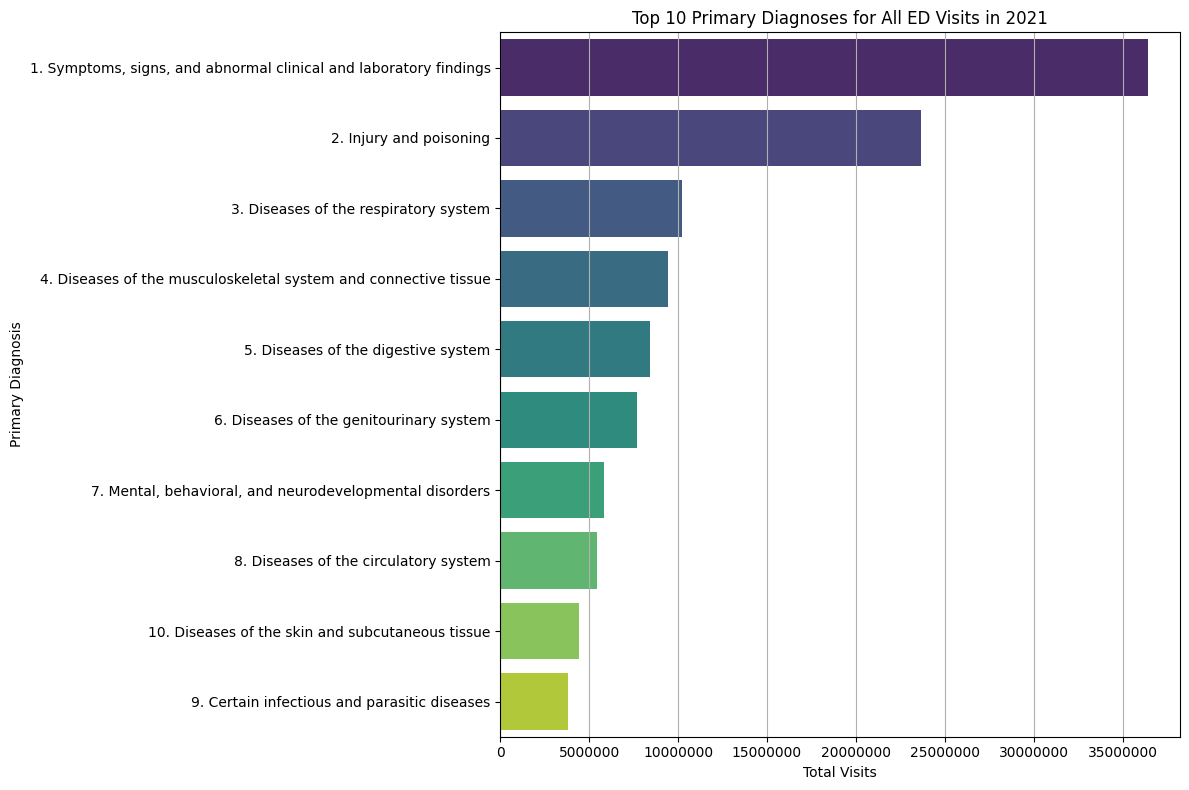

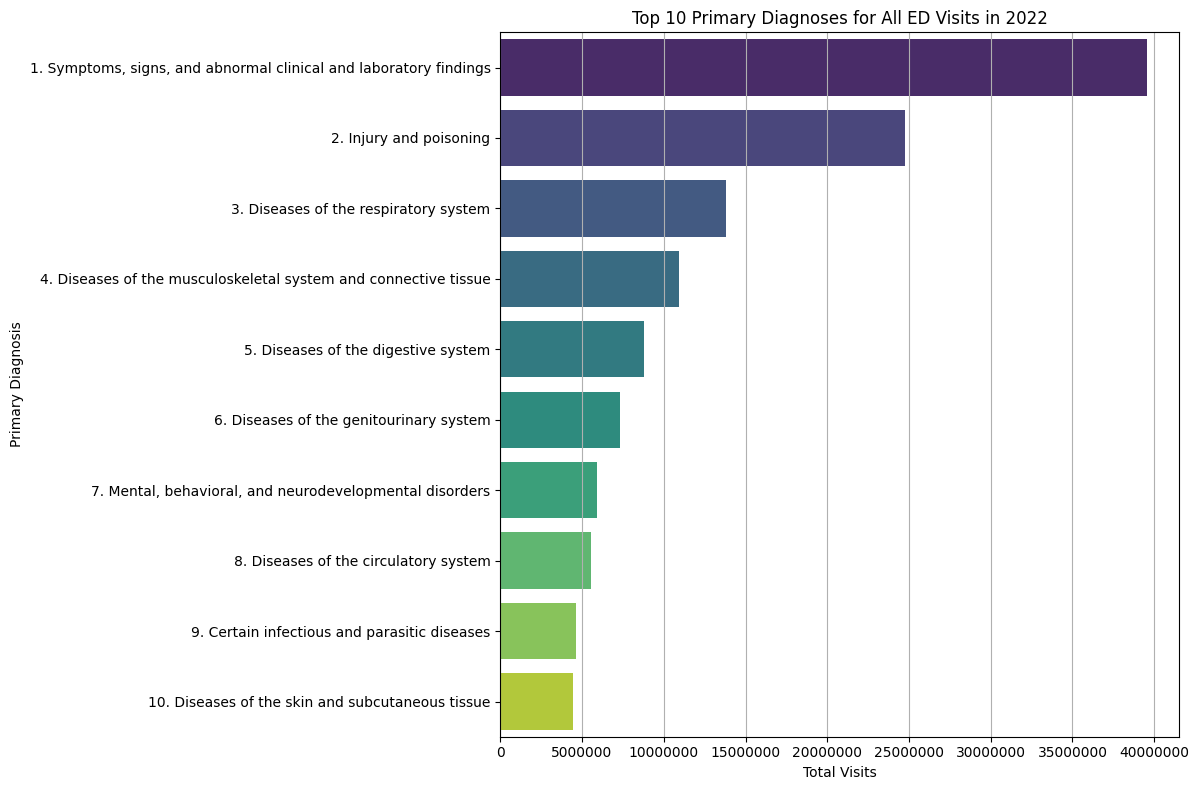

In [ ]:
unique_years = df['Year'].unique()

for year in sorted(unique_years):
    top_diagnoses_year = df[
        (df['Year'] == year) &
        (df['Measure Type'] == 'By primary diagnosis') &
        (df['Leading 10 Ranking'] > 0) &
        (df['Group'] == 'Total')
    ].groupby('Measure')['Estimate'].sum().sort_values(ascending=False).reset_index()

    if not top_diagnoses_year.empty:
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Estimate', y='Measure', hue='Measure', data=top_diagnoses_year, palette='viridis', legend=False)
        plt.title(f'Top 10 Primary Diagnoses for All ED Visits in {year}')
        plt.xlabel('Total Visits')
        plt.ylabel('Primary Diagnosis')
        plt.ticklabel_format(style='plain', axis='x')
        plt.grid(axis='x')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data for top diagnoses for the year {year}")

In [ ]:
top_diagnoses_data = df[
    (df['Measure Type'] == 'By primary diagnosis') &
    (df['Leading 10 Ranking'] > 0)
].copy()

print(top_diagnoses_data['Measure'].unique())
print(f"Number of unique diagnoses: {len(top_diagnoses_data['Measure'].unique())}")


['1. Symptoms, signs, and abnormal clinical and laboratory findings'
 '2. Injury and poisoning' '3. Diseases of the respiratory system'
 '4. Diseases of the musculoskeletal system and connective tissue'
 '5. Diseases of the digestive system'
 '6. Diseases of the genitourinary system'
 '7. Mental, behavioral, and neurodevelopmental disorders'
 '8. Diseases of the circulatory system'
 '9. Certain infectious and parasitic diseases'
 '10. Diseases of the skin and subcutaneous tissue']
Number of unique diagnoses: 10


In [ ]:
top_diagnoses_sex = top_diagnoses_data[top_diagnoses_data['Group'] == 'By sex']
top_diagnoses_sex_yearly = top_diagnoses_sex.groupby(['Year', 'Subgroup', 'Measure'])['Estimate'].sum().reset_index()
print(top_diagnoses_sex_yearly.head())

   Year Subgroup                                            Measure  \
0  2016   Female  1. Symptoms, signs, and abnormal clinical and ...   
1  2016   Female   10. Diseases of the skin and subcutaneous tissue   
2  2016   Female                            2. Injury and poisoning   
3  2016   Female              3. Diseases of the respiratory system   
4  2016   Female  4. Diseases of the musculoskeletal system and ...   

     Estimate  
0  19851000.0  
1   2534000.0  
2  14394000.0  
3   8051000.0  
4   5744000.0  


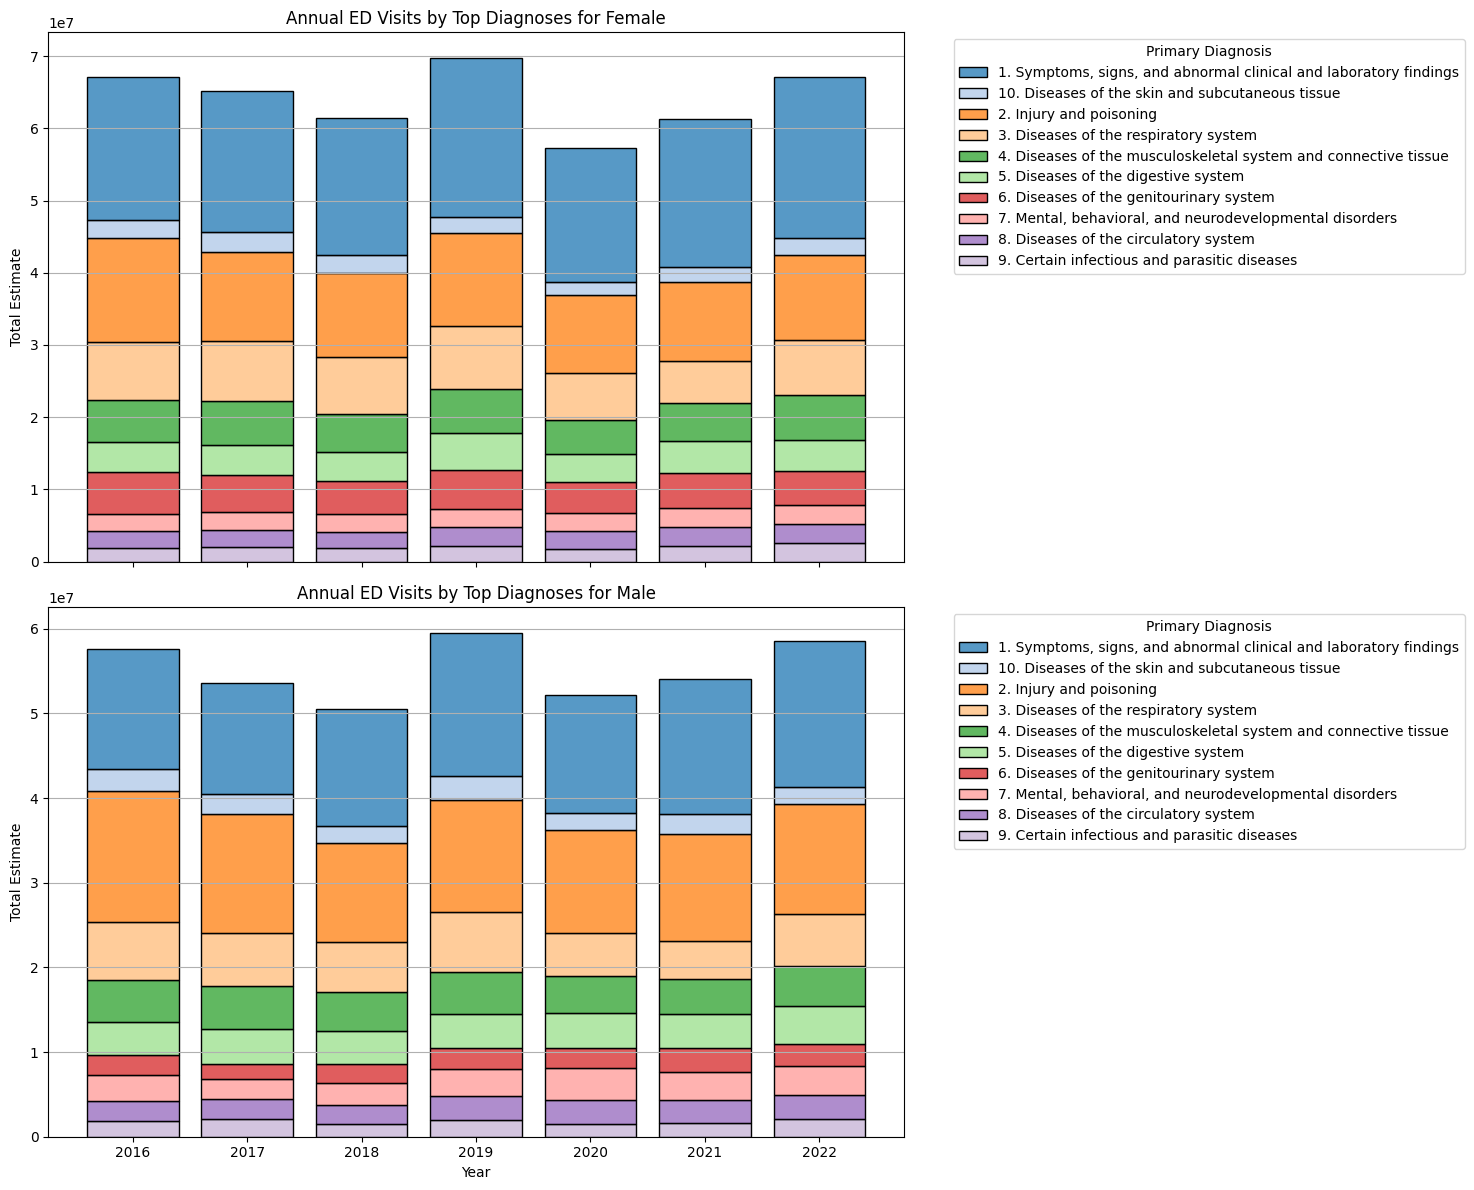

In [ ]:
measures_diagnosis = top_diagnoses_sex_yearly['Measure'].unique()

palette_diagnosis = sns.color_palette('tab20', n_colors=len(measures_diagnosis))
color_map_diagnosis = dict(zip(measures_diagnosis, palette_diagnosis))

subgroups_diagnosis = top_diagnoses_sex_yearly['Subgroup'].unique()

fig, axes = plt.subplots(len(subgroups_diagnosis), 1, figsize=(15, 12), sharex=True)

if len(subgroups_diagnosis) == 1:
    axes = [axes]

for i, subgroup in enumerate(subgroups_diagnosis):

    subset_data = top_diagnoses_sex_yearly[top_diagnoses_sex_yearly['Subgroup'] == subgroup]

    min_year = subset_data['Year'].min()
    max_year = subset_data['Year'].max()

    year_bins = [y - 0.5 for y in range(min_year, max_year + 2)]

    sns.histplot(
        data=subset_data,
        x='Year',
        weights='Estimate',
        hue='Measure',
        multiple='stack',
        shrink=0.8,
        palette=color_map_diagnosis,
        kde=False,
        ax=axes[i],
        bins=year_bins
    )

    axes[i].set_title(f'Annual ED Visits by Top Diagnoses for {subgroup}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Estimate')
    axes[i].set_xticks(sorted(subset_data['Year'].unique()))
    axes[i].grid(axis='y')

    legend = axes[i].get_legend()
    if legend:
        legend.set_title('Primary Diagnosis')
        legend.set_bbox_to_anchor((1.05, 1))
        legend.set_loc('upper left')

plt.tight_layout()
plt.show()

**Cinsiyete Göre En Sık Görülen Tanılar**
Genel Olarak Semptomlar: Hem erkeklerde hem de kadınlarda '1. Semptomlar, belirtiler ve anormal klinik ve laboratuvar bulguları' tanısının en sık görülen nedenlerden biri olduğunu fark ettik. Bu geniş kategori, spesifik bir tanının konulamadığı veya başlangıç aşamasındaki durumları kapsıyor.
Cinsiyete Göra Tanı Farkları: Kadınlarda 'Dolaşım sistemi hastalıkları' ve 'Zihinsel, davranışsal ve nörogelişimsel bozukluklar' gibi tanılar daha belirgin olabilirken, erkeklerde 'Yaralanma ve zehirlenme' gibi durumların payının daha yüksek olduğunu gözlemledik. Yıllara göre bu dağılımlar yığılmış histogramlarla görselleştirildi.

In [ ]:
top_diagnoses_age = top_diagnoses_data[top_diagnoses_data['Group'] == 'By age']
top_diagnoses_age_yearly = top_diagnoses_age.groupby(['Year', 'Subgroup', 'Measure'])['Estimate'].sum().reset_index()
print(top_diagnoses_age_yearly.head())

   Year        Subgroup                                            Measure  \
0  2016  0-17 years old  1. Symptoms, signs, and abnormal clinical and ...   
1  2016  0-17 years old   10. Diseases of the skin and subcutaneous tissue   
2  2016  0-17 years old                            2. Injury and poisoning   
3  2016  0-17 years old              3. Diseases of the respiratory system   
4  2016  0-17 years old  4. Diseases of the musculoskeletal system and ...   

    Estimate  
0  6486000.0  
1  1182000.0  
2  8447000.0  
3  5903000.0  
4   847000.0  


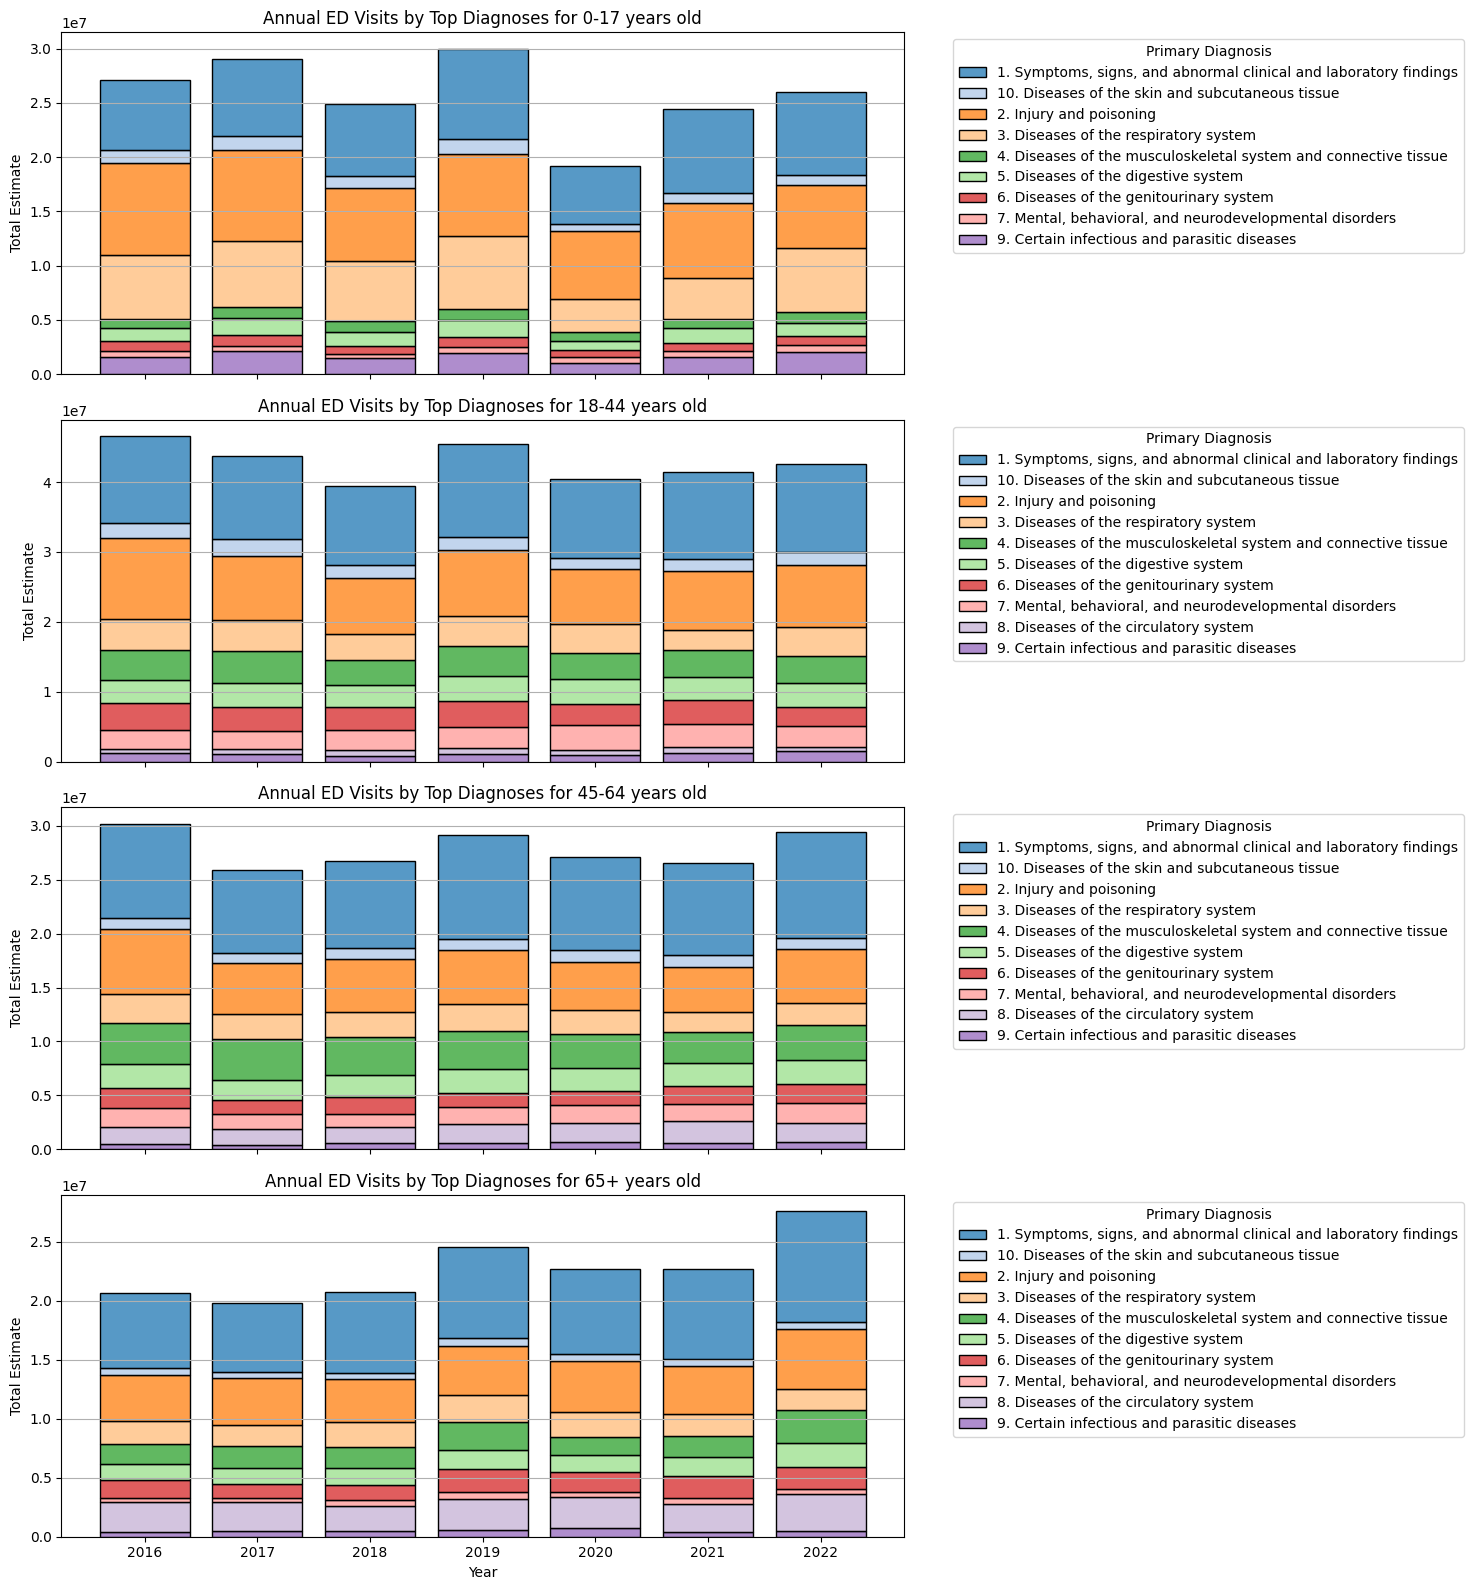

In [ ]:
measures_diagnosis = top_diagnoses_age_yearly['Measure'].unique()

palette_diagnosis = sns.color_palette('tab20', n_colors=len(measures_diagnosis))
color_map_diagnosis = dict(zip(measures_diagnosis, palette_diagnosis))

subgroups_diagnosis_age = top_diagnoses_age_yearly['Subgroup'].unique()

fig, axes = plt.subplots(len(subgroups_diagnosis_age), 1, figsize=(15, len(subgroups_diagnosis_age) * 4), sharex=True)

if len(subgroups_diagnosis_age) == 1:
    axes = [axes]

for i, subgroup in enumerate(subgroups_diagnosis_age):

    subset_data = top_diagnoses_age_yearly[top_diagnoses_age_yearly['Subgroup'] == subgroup]

    min_year = subset_data['Year'].min()
    max_year = subset_data['Year'].max()

    year_bins = [y - 0.5 for y in range(min_year, max_year + 2)]

    sns.histplot(
        data=subset_data,
        x='Year',
        weights='Estimate',
        hue='Measure',
        multiple='stack',
        shrink=0.8,
        palette=color_map_diagnosis,
        kde=False,
        ax=axes[i],
        bins=year_bins
    )

    axes[i].set_title(f'Annual ED Visits by Top Diagnoses for {subgroup}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Estimate')
    axes[i].set_xticks(sorted(subset_data['Year'].unique()))
    axes[i].grid(axis='y')

    legend = axes[i].get_legend()
    if legend:
        legend.set_title('Primary Diagnosis')
        legend.set_bbox_to_anchor((1.05, 1))
        legend.set_loc('upper left')

plt.tight_layout()
plt.show()

**Yaş Gruplarına Göre En Sık Görülen Tanılar**
Çocuklarda ve Gençlerde: 0-17 yaş grubunda 'Solunum sistemi hastalıkları' ve 'Yaralanma ve zehirlenme' gibi tanılar ön plana çıkarken, genç yetişkinlerde (18-44 yaş) 'Zihinsel, davranışsal ve nörogelişimsel bozukluklar' ve 'Semptomlar' kategorileri daha sık görüldü.
Yaşlılarda Kronik Hastalıklar: İleriki yaş gruplarında (45-64 ve 65+ yaş) 'Dolaşım sistemi hastalıkları', 'Sindirim sistemi hastalıkları' gibi kronik durumlarla ilişkili tanıların daha baskın olduğunu gözlemledik. Bu, yaşla birlikte değişen sağlık ihtiyaçlarını ve risk profillerini yansıtıyor.

#**Genel Bulgular ve Dikkat Çekici Noktalar**
Bu analiz yolculuğunda, acil servis ziyaretlerine ilişkin verileri derinlemesine inceleyerek önemli bilgiler edindik. İşte genel çıkarımlarımız:

1. COVID-19 Pandemisinin Etkisi
Keskin Düşüş ve Toparlanma: Acil servis ziyaretlerinin yıllık toplamlarında, 2019 sonrası 2020'de gözle görülür bir düşüş yaşadık. Bu durum, COVID-19 pandemisinin küresel bir sağlık krizi olarak acil servis kullanım alışkanlıklarını önemli ölçüde etkilediğini, insanların enfeksiyon riskinden kaçınmak veya sağlık sisteminin yoğunluğunu azaltmak amacıyla acil servislere daha az başvurduğunu gösteriyor. Sonraki yıllarda (2021-2022) kısmi bir toparlanma olsa da, pandemi öncesi seviyelere tam olarak ulaşılamadığını fark ettik.
2. Demografik Farklılıklar (Cinsiyet ve Yaş)
Cinsiyet Bazında Ziyaret Yoğunluğu: Tüm yıllar boyunca kadınların acil servis ziyaretlerinin erkeklerden daha yüksek olduğunu gözlemledik. Bu, kadınların genel sağlık hizmeti kullanımındaki daha yüksek eğilimi veya belirli sağlık sorunlarının acil servis ihtiyacını daha sık tetiklemesiyle ilişkili olabilir.
Yaş Gruplarının Ziyaret Dinamikleri: 18-44 yaş grubunun acil servis ziyaretlerinde en yüksek paya sahip olduğunu gördük. 0-17 yaş grubunda solunum yolu enfeksiyonları ve yaralanmalar öne çıkarken, yaşlı gruplarda (45-64 ve 65+) dolaşım ve sindirim sistemi hastalıkları gibi kronik durumların daha yaygın olduğunu fark ettik. Pandemi dönemindeki düşüş tüm yaş gruplarını etkilese de, toparlanma süreçleri yaş gruplarına göre farklılık gösterdi.
3. Ziyaret Nedenleri ve Tanılar
Yaygın Şikayetler: Cinsiyet veya yaş fark etmeksizin 'karın ağrısı', 'göğüs ağrısı' ve 'genel ağrılar' gibi semptomatik başvuruların acil servislerin önemli bir kısmını oluşturduğunu belirledik. Bu durum, acil servislerin genel sağlık sorunlarının ilk başvuru noktası olma rolünü pekiştiriyor.
Cinsiyete ve Yaşa Özgü Tanılar: Kadınlarda belirli dolaşım veya ruhsal rahatsızlıklar daha sık görülürken, erkeklerde yaralanma ve zehirlenmelerin daha belirgin olduğunu gözlemledik. Yaş gruplarında ise, çocuklarda ve gençlerde akut solunum yolu sorunları ve travmalar, yaşlılarda ise kronik hastalıkların akut alevlenmelerinin acil servis ziyaretlerinin ana nedenleri olduğunu tespit ettik.
4. Bölgesel Farklılıklar
Güney Bölgesi Liderliği: ABD'nin Güney bölgesinin, yıllar boyunca acil servis ziyaretlerinde sürekli olarak en yüksek sayılara sahip olduğunu gördük. Bu durum, bölgenin nüfus yoğunluğu, sağlık hizmeti altyapısı veya sosyoekonomik faktörlerle ilişkili olabilir. Bölgesel düzeyde ziyaret eğilimlerinde genel pandemik düşüş ve toparlanma gözlense de, her bölgenin kendi dinamiklerini sergilediğini fark ettik.
Genel Çıkarımlar
Acil servis verileri, sağlık sisteminin genel sağlığı, toplumsal sağlık ihtiyaçları ve dış etkenlere (pandemi gibi) verilen tepkiler hakkında bize zengin bir tablo sundu. Demografik özelliklere, başvuru nedenlerine ve coğrafi konuma göre değişen bu dinamikler, gelecekteki sağlık politikaları, kaynak tahsisi ve halk sağlığı müdahaleleri için değerli bilgiler sağlamaktadır. Özellikle pandemi gibi krizlerin acil servis kullanımı üzerindeki ani ve uzun vadeli etkileri, sağlık sistemimizin esnekliğini ve dayanıklılığını artırma ihtiyacını ortaya koymuştur.

Bu veriler sayesinde, acil servislerin sadece hastalıklarla mücadele değil, aynı zamanda toplumun genel sağlık göstergeleri olarak da önemli bir rol oynadığını bir kez daha görmüş olduk.